<a href="https://colab.research.google.com/github/pscabral/IFMA_Softex/blob/main/EfficientNetB3_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clonar o repositório "Fruit-Images-Dataset" do GitHub
!git clone https://github.com/Horea94/Fruit-Images-Dataset

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385858, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8659/8659), done.
remote: Total 385858 (delta 37), reused 8688 (delta 34), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 29.89 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Updating files: 100% (90503/90503), done.


In [2]:
import os

# Diretório raiz
root_directory = '/content/Fruit-Images-Dataset/Validation'

# Lista de subpastas
subfolders = [
    'apple_6',
    'apple_braeburn_1',
    'apple_crimson_snow_1',
    'apple_golden_1',
    'apple_golden_2',
    'apple_golden_3',
    'apple_granny_smith_1',
    'apple_hit_1',
    'apple_pink_lady_1',
    'apple_red_1',
    'apple_red_2',
    'apple_red_3',
    'apple_red_delicious_1',
    'apple_red_yellow_1',
    'apple_rotten_1',
    'cabbage_white_1',
    'carrot_1',
    'cucumber_1',
    'cucumber_3',
    'eggplant_violet_1',
    'pear_1',
    'pear_3',
    'zucchini_1',
    'zucchini_dark_1'
]

# Crie a estrutura de pastas
for folder in subfolders:
    folder_path = os.path.join(root_directory, folder)
    os.makedirs(folder_path, exist_ok=True)

In [3]:
# Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path

# ML Imports
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall

In [4]:
# Definindo uma semente para o TensorFlow a fim de manter os resultados consistentes
tf.random.set_seed(4)

In [5]:
# Caminho para os dados de treinamento
train_data = Path(r'/content/Fruit-Images-Dataset/Training')
# Caminho para os dados de teste
train_data = Path(r'/content/Fruit-Images-Dataset/Test')
# Caminho para os dados de validação
train_data = Path(r'/content/Fruit-Images-Dataset/Validation')

In [6]:
import os
from pathlib import Path

# Caminho para o diretório de dados de treinamento
train_data = Path('/content/Fruit-Images-Dataset/Training')

# Lista de caminhos de arquivo de imagem de treinamento, convertidos em strings
training_images = [str(image) for image in train_data.glob('*/*')]

# Extrair apenas os nomes dos arquivos de imagem
image_names = [os.path.basename(image) for image in training_images]

# Exibir os primeiros nomes de imagem
print(image_names[925:936])

# Obter o número total de imagens
total_images = len(image_names)
print(total_images)


['277_100.jpg', '267_100.jpg', '209_100.jpg', '263_100.jpg', '142_100.jpg', '174_100.jpg', 'r_255_100.jpg', 'r_263_100.jpg', 'r_305_100.jpg', '24_100.jpg', '318_100.jpg']
67692


In [7]:
# Lista de caminhos para imagens de treinamento - Obtém todos os arquivos nos subdiretórios de train_data
training_images = list(train_data.glob('*/*'))

In [9]:
# Seleciona um intervalo de imagens de treinamento, do índice 925 ao 935 (incluindo o índice 925 e excluindo o índice 936).
training_images[925:936]

[PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/277_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/267_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/209_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/263_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/142_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/174_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/r_255_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/r_263_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/r_305_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/24_100.jpg'),
 PosixPath('/content/Fruit-Images-Dataset/Training/Clementine/318_100.jpg')]

In [10]:
# Converte a lista de caminhos para imagens de treinamento em uma lista de strings
training_images = list(map(lambda x: str(x), training_images))

In [11]:
# Seleciona um intervalo de imagens de treinamento, do índice 925 ao 935 (incluindo o índice 925 e excluindo o índice 936).
training_images[925:936]

['/content/Fruit-Images-Dataset/Training/Clementine/277_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/267_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/209_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/263_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/142_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/174_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/r_255_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/r_263_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/r_305_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/24_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/318_100.jpg']

In [12]:
# Obtém o comprimento (número de elementos) da lista de caminhos para imagens de treinamento
len(training_images)

67692

In [13]:
# Função para extrair o rótulo de um caminho de imagem
def labelExtraction(image_path):
    # Divida o caminho com base na barra '/'
    path_parts = image_path.split("/")
    # O rótulo estará na penúltima parte (índice -2)
    return path_parts[-2]

# Aplica a função labelExtraction a cada caminho de imagem na lista training_images
train_images_label = list(map(lambda x: labelExtraction(x), training_images))
# Seleciona um intervalo de rótulos de imagens de treinamento (índice 925 ao 935)
train_images_label[925:936]

['Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine',
 'Clementine']

In [14]:
# Inicializa um objeto LabelEncoder para codificar rótulos categóricos em valores numéricos
encoder = LabelEncoder()

In [15]:
# Aplica o codificador LabelEncoder para transformar os rótulos de treinamento em valores numéricos
train_images_label = encoder.fit_transform(train_images_label)

In [16]:
# Seleciona um intervalo de rótulos de imagens de treinamento após a codificação
train_images_label[925:936]

array([33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33])

In [17]:
# A linha abaixo converte os rótulos das imagens de treinamento em formato one-hot encoding.
# Isso é útil em problemas de classificação, onde você tem várias classes e deseja representar
# cada classe como um vetor binário onde apenas um dos elementos é 1 e os outros são 0.
train_images_label = tf.keras.utils.to_categorical(train_images_label)

In [18]:
# A linha abaixo acessa uma fatia (slice) do array 'train_images_label', abrangendo os elementos do índice 925 ao 936.
train_images_label[925:936]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
# Divisão entre dados de treinamento e dados de validação
# A linha abaixo utiliza a função 'train_test_split' para dividir os conjuntos de dados 'training_images'
# e 'train_images_label' em conjuntos de treinamento ('X_train' e 'y_train') e conjuntos de validação ('X_valid' e 'y_valid').
X_train, X_valid, y_train, y_valid = train_test_split(training_images, train_images_label)

In [20]:
# A linha abaixo acessa uma fatia (slice) do conjunto de dados de treinamento 'X_train',
# abrangendo os elementos do índice 18 ao 22.
X_train[18:23]

['/content/Fruit-Images-Dataset/Training/Kiwi/r_317_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Avocado/27_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Tangelo/139_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Pepper Green/r_161_100.jpg',
 '/content/Fruit-Images-Dataset/Training/Clementine/27_100.jpg']

In [21]:
# A linha abaixo acessa uma fatia (slice) do conjunto de rótulos de treinamento 'y_train',
# abrangendo os elementos do índice 15 ao 17.
y_train[15:18]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [22]:
import os
import tensorflow as tf

# Diretório raiz onde suas imagens estão localizadas
diretorio_raiz = "/content/Fruit-Images-Dataset/Training"

# Tamanho desejado para as imagens redimensionadas
img_size = 224

# Crie um modelo de redimensionamento
resize = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Resizing(img_size, img_size)])

# Percorra todas as pastas e subpastas
for raiz, diretorios, arquivos in os.walk(diretorio_raiz):
    for arquivo in arquivos:
        # Verifique se o arquivo é uma imagem (você pode adicionar mais extensões, se necessário)
        if arquivo.endswith(".jpg") or arquivo.endswith(".png"):
            imagem_path = os.path.join(raiz, arquivo)
            # Carregue a imagem
            imagem = tf.keras.preprocessing.image.load_img(imagem_path)
            # Redimensione a imagem
            imagem_redimensionada = resize(imagem)
            # Salve a imagem redimensionada de volta no mesmo local
            tf.keras.preprocessing.image.save_img(imagem_path, imagem_redimensionada)

print("Todas as imagens foram redimensionadas com sucesso.")

Todas as imagens foram redimensionadas com sucesso.


In [23]:
# Criação de um objeto para aumentar o conjunto de dados (data augmentation)
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),             # Realiza um espelhamento horizontal aleatório das imagens.
    RandomRotation(0.2),                  # Aplica uma rotação aleatória de até 0.2 radianos nas imagens.
    RandomZoom(height_factor=(-0.3, -0.2)) # Aplica um zoom aleatório nas imagens, variando a altura dentro do intervalo (-0.3, -0.2).
])

In [24]:
# Hiperparâmetros
batch_size = 32  # Tamanho do lote (batch) utilizado durante o treinamento.
autotune = tf.data.experimental.AUTOTUNE  # Valor especial que permite ao TensorFlow otimizar o desempenho de operações de entrada de dados automaticamente.

In [26]:
# Carregar e Transformar Imagens
def loadTransform(image, label):
    image = tf.io.read_file(image)      # Lê o arquivo de imagem.
    image = tf.io.decode_jpeg(image, channels=3)  # Decodifica o arquivo de imagem no formato JPEG com 3 canais de cores.
    return image, label

In [28]:
# Preparar o conjunto de dados no formato TensorFlow
def prepareDataset(path, labels, train=True):

    # Preparar os dados
    image_paths = tf.convert_to_tensor(path)  # Converter os caminhos das imagens em um tensor TensorFlow.
    labels = tf.convert_to_tensor(labels)     # Converter os rótulos em um tensor TensorFlow.

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)  # Criar um conjunto de dados a partir dos caminhos das imagens.
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)       # Criar um conjunto de dados a partir dos rótulos.

    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))  # Combina os conjuntos de dados de imagens e rótulos.
    dataset = dataset.map(lambda image, label: loadTransform(image, label))  # Aplicar a função 'loadTransform' para carregar e transformar as imagens.
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls=autotune)  # Redimensionar as imagens.

    dataset = dataset.shuffle(1000)  # Embaralhar o conjunto de dados.
    dataset = dataset.batch(batch_size)  # Agrupar as imagens em lotes.

    # Se train == True, aplicar o aumento de dados nas imagens
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=autotune)

    # Se train == False, repetir o conjunto de dados e retornar
    dataset = dataset.repeat()

    return dataset

In [29]:
# Conjunto de dados de treinamento
train_dataset = prepareDataset(X_train, y_train)

In [30]:
# Formato
image, label = next(iter(train_dataset))
print(image.shape)  # Imprime o formato (shape) das imagens no conjunto de dados.
print(label.shape)  # Imprime o formato (shape) dos rótulos no conjunto de dados.

(32, 224, 224, 3)
(32, 131)


Cherry Wax Red


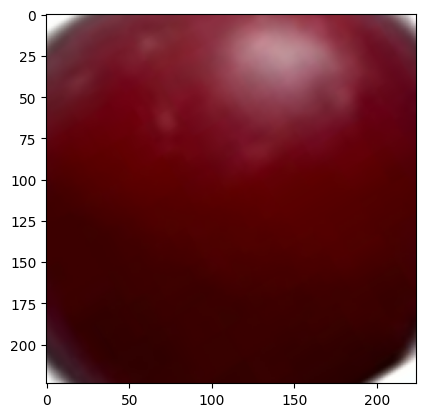

In [31]:
# Visualização de uma imagem e seu rótulo
print(encoder.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy() / 255).reshape(224, 224, 3))

In [32]:
# Cria o dataset de validação
valid_dataset = prepareDataset(X_valid, y_valid, train = False)

In [33]:
# Formato
image, label = next(iter(valid_dataset))
print(image.shape)  # Imprime o formato (shape) das imagens no conjunto de dados de validação.
print(label.shape)  # Imprime o formato (shape) dos rótulos no conjunto de dados de validação.

(32, 224, 224, 3)
(32, 131)


Corn Husk


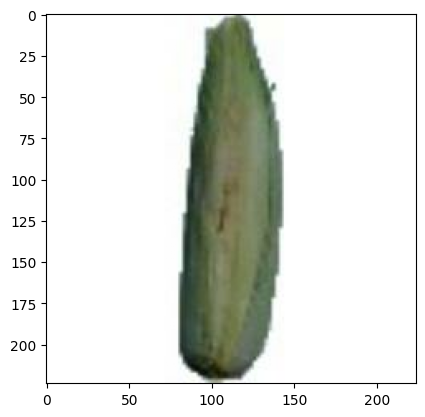

In [34]:
# Visualizando uma imagem e seu rótulo
print(encoder.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy() / 255).reshape(224, 224, 3))

In [93]:
#Deep learning Model
https://www.kaggle.com/code/jonathansaccomano/fruits-image-classification/notebook